# ***Machine Learning-Driven Detection of Marine Oil Spills.***
## A Tool for Ocean Conservation.
### by Thilak R

#

# 1. import neccesary modules

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from pathlib import Path
import os.path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import os

In [20]:
import warnings
warnings.filterwarnings('ignore')

# 2.load train,validation and test data

In [22]:
train = r'C:\Users\THILAK R\Downloads\oil_spill\final dataset used for oil spill\dataset-final\dataset\train'
validation = r'C:\Users\THILAK R\Downloads\oil_spill\final dataset used for oil spill\dataset-final\dataset\Validation'
test = r'C:\Users\THILAK R\Downloads\oil_spill\final dataset used for oil spill\dataset-final\dataset\test'


# 3.resize image for efficient image process

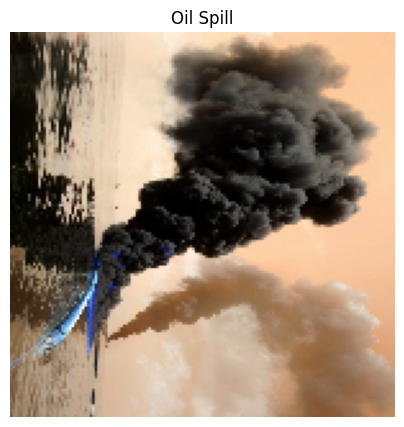

Size of image 1: (150, 150, 3)


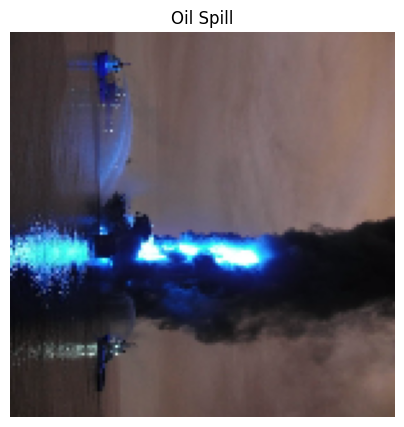

Size of image 2: (150, 150, 3)


In [33]:
labels = ['Non Oil Spill', 'Oil Spill']
img_size = 150
data = []

for label in labels: 
    path = os.path.join(r'C:\Users\THILAK R\Downloads\oil_spill\final dataset used for oil spill\dataset-final\dataset\train', label)  
    class_num = labels.index(label)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)

        if img_arr is not None: 
            img_arr = cv2.resize(img_arr, (img_size, img_size))  
            data.append([img_arr, class_num])  

count=0
for i in range(len(data)):
    if data[i][1] == 1: 
        plt.figure(figsize=(5, 5))
        plt.imshow(data[i][0])  
        plt.title(labels[data[i][1]])  
        plt.axis('off')  
        plt.show()
        
        print(f"Size of image {count + 1}: {data[i][0].shape}")
        
        count += 1  
        
        if count == 2:  
            break

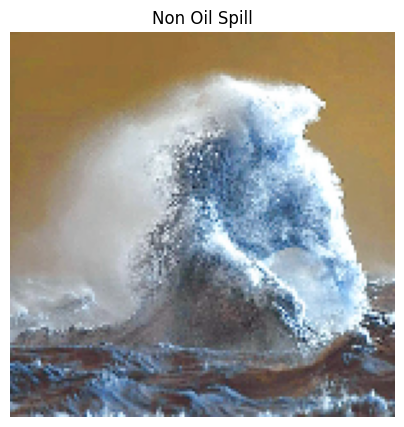

Size of image 1: (150, 150, 3)


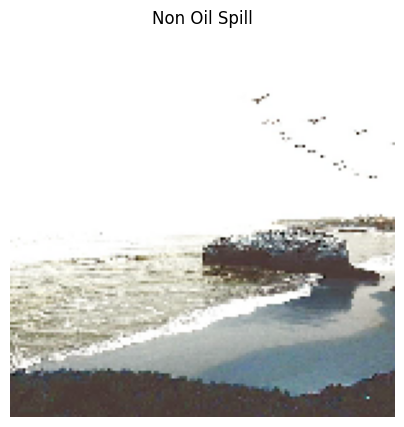

Size of image 2: (150, 150, 3)


In [35]:
data = np.array(data, dtype=object)

for i in range(2):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[i][0])  
    plt.title(labels[data[i][1]])  
    plt.axis('off')  
    plt.show()
    
    print(f"Size of image {i + 1}: {data[i][0].shape}")

#

#

# 4.defining the directory

In [39]:
def load_data(directory):
    data = []
    for label in labels: 
        path = os.path.join(directory, label)  
        class_num = labels.index(label)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_arr = cv2.imread(img_path)

            if img_arr is not None: 
                img_arr = cv2.resize(img_arr, (img_size, img_size))  
                data.append([img_arr, class_num])  
    return np.array(data, dtype=object)


#

#

#

# 5.Training the model

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 251ms/step - accuracy: 0.5943 - loss: 0.6879 - val_accuracy: 0.6883 - val_loss: 0.5958
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.7990 - loss: 0.4904 - val_accuracy: 0.8083 - val_loss: 0.4085
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8678 - loss: 0.3251 - val_accuracy: 0.8450 - val_loss: 0.3485
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.9071 - loss: 0.2392 - val_accuracy: 0.9000 - val_loss: 0.2147
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.9197 - loss: 0.1867 - val_accuracy: 0.9233 - val_loss: 0.1978
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9646 - loss: 0.1188 - val_accuracy: 0.9200 - val_loss: 0.1675
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.9789 - loss: 0.0726 - val_accuracy: 0.9317 - val_loss: 0.1508
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.9766 - loss: 0.0711 - val_accu

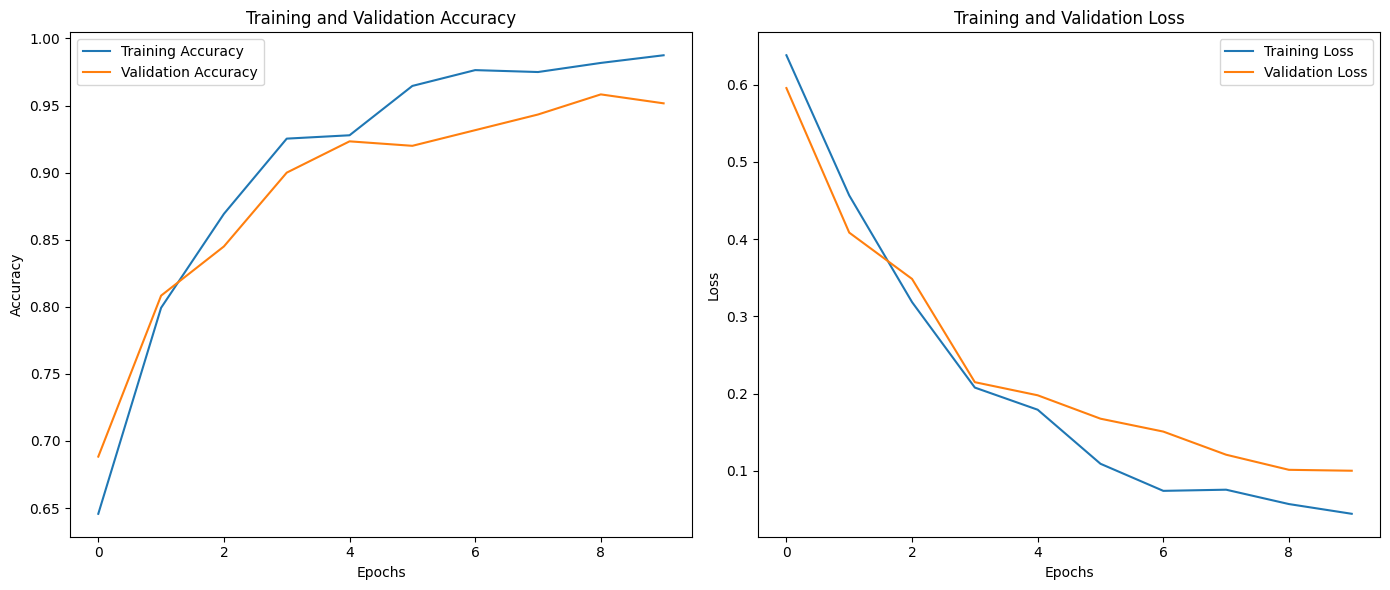

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


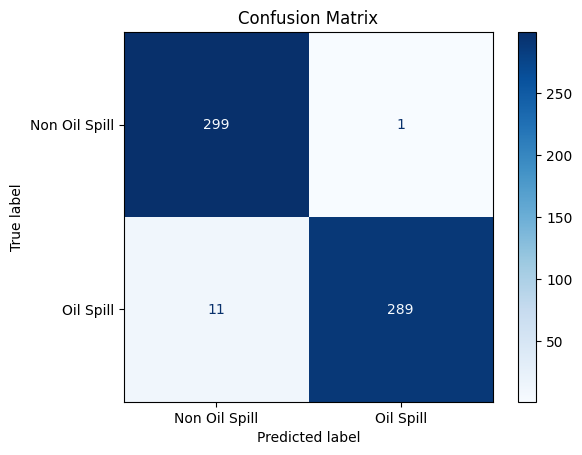

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3), padding="same"))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))


model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), shuffle=True, batch_size=64)
y_pred_test = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_test))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(train_accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# Generate predictions on the test set and create the confusion matrix
y_pred_test = (model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Oil Spill', 'Oil Spill'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [81]:
# Assuming you have already trained your model
model.save('marine_model.h5')  # Replace with the desired path and filename
